In [ ]:
# # -*- coding: utf-8 -*-
# """Copy of Using CNN

In [ ]:
# Automatically generated by Colab.

In [ ]:
# Original file is located at
#     https://colab.research.google.com/drive/1W3x7KEzGqpq0B8jfnLRKHmuYzkZE6Du0
# """

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding, Conv1D, GlobalMaxPooling1D, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
import re

Load datasets

In [ ]:
train_data = pd.read_csv('/content/final_processed_dataset.csv')
test_data = pd.read_excel('/content/testing_dataset.xlsx')

Preprocessing function

In [ ]:
def preprocess_data(data):
    # Assuming 'tweet' and 'geolocation' columns are present in your data
    data = data.dropna(subset=['tweet', 'geo'])  # Adjust for actual columns
    data['tweet'] = data['tweet'].apply(lambda x: re.sub(r'\W+', ' ', x.lower()).strip())
    return data

In [ ]:
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

<ipython-input-8-3b22d1f51473>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda x: re.sub(r'\W+', ' ', x.lower()).strip())
<ipython-input-8-3b22d1f51473>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda x: re.sub(r'\W+', ' ', x.lower()).strip())


Prepare data for model input

In [ ]:
X_train, y_train = train_data['tweet'], train_data['geo']
X_test, y_test = test_data['tweet'], test_data['geo']

Text Vectorization and Embedding configuration

In [ ]:
max_tokens = 10000
max_len = 100  # adjust based on your data
vectorize_layer = TextVectorization(max_tokens=max_tokens, output_mode='int', output_sequence_length=max_len)
vectorize_layer.adapt(X_train)

Model definition

In [ ]:
def create_cnn_model():
    model = Sequential([
        Embedding(max_tokens, 128, input_length=max_len),
        Conv1D(64, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'softmax' and change units for multi-class
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class
    return model

In [ ]:
def create_bilstm_model():
    model = Sequential([
        Embedding(max_tokens, 128, input_length=max_len),
        Bidirectional(LSTM(64, return_sequences=True)),
        GlobalMaxPooling1D(),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'softmax' and change units for multi-class
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class
    return model

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

Assuming 'geolocation' is categorical, convert it to numerical labels and then to one-hot

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

Convert labels to one-hot encoding

In [ ]:
y_train_one_hot = to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_test_one_hot = to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

Adjust model according to the number of unique labels

In [ ]:
num_classes = len(label_encoder.classes_)
output_units = num_classes  # Since we have multiple classes
activation = 'softmax'

Model definition (using CNN as example, similar adjustments for BiLSTM)

In [ ]:
model = Sequential([
    Embedding(max_tokens, 128, input_length=max_len),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(output_units, activation=activation)  # Adjusted output layer
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model Training

In [ ]:
model.fit(vectorize_layer(X_train), y_train_one_hot, epochs=10, validation_split=0.1)  # Use one-hot encoded labels

Epoch 1/10
256/256 [==============================] - 11s 39ms/step - loss: 2.6873 - accuracy: 0.2774 - val_loss: 4.3071 - val_accuracy: 0.0419
Epoch 2/10
256/256 [==============================] - 10s 39ms/step - loss: 2.4178 - accuracy: 0.3361 - val_loss: 4.2212 - val_accuracy: 0.0419
Epoch 3/10
256/256 [==============================] - 9s 34ms/step - loss: 2.1496 - accuracy: 0.3709 - val_loss: 4.5482 - val_accuracy: 0.0485
Epoch 4/10
256/256 [==============================] - 10s 39ms/step - loss: 1.6141 - accuracy: 0.5279 - val_loss: 4.9844 - val_accuracy: 0.0551
Epoch 5/10
256/256 [==============================] - 10s 38ms/step - loss: 1.0958 - accuracy: 0.7165 - val_loss: 5.8412 - val_accuracy: 0.0584
Epoch 6/10
256/256 [==============================] - 10s 37ms/step - loss: 0.7732 - accuracy: 0.8205 - val_loss: 6.6039 - val_accuracy: 0.0496
Epoch 7/10
256/256 [==============================] - 9s 34ms/step - loss: 0.5869 - accuracy: 0.8661 - val_loss: 7.3024 - val_accuracy: 0

Model Evaluation

In [ ]:
test_accuracy = model.evaluate(vectorize_layer(X_test), y_test_one_hot)[1]  # Use one-hot encoded labels
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

57/57 [==============================] - 0s 7ms/step - loss: 1.1447 - accuracy: 0.8369
Test Accuracy: 83.69%


In [ ]:
import matplotlib.pyplot as plt

Model Training with history tracking

In [ ]:
history = model.fit(vectorize_layer(X_train), y_train_one_hot, epochs=10, validation_split=0.1)

Epoch 1/10
256/256 [==============================] - 10s 38ms/step - loss: 0.3475 - accuracy: 0.9189 - val_loss: 8.5284 - val_accuracy: 0.0474
Epoch 2/10
256/256 [==============================] - 9s 35ms/step - loss: 0.3115 - accuracy: 0.9287 - val_loss: 8.8876 - val_accuracy: 0.0496
Epoch 3/10
256/256 [==============================] - 10s 39ms/step - loss: 0.2961 - accuracy: 0.9336 - val_loss: 10.0358 - val_accuracy: 0.0441
Epoch 4/10
256/256 [==============================] - 10s 41ms/step - loss: 0.2766 - accuracy: 0.9362 - val_loss: 9.2107 - val_accuracy: 0.0507
Epoch 5/10
256/256 [==============================] - 10s 39ms/step - loss: 0.2690 - accuracy: 0.9390 - val_loss: 9.4114 - val_accuracy: 0.0496
Epoch 6/10
256/256 [==============================] - 9s 36ms/step - loss: 0.2542 - accuracy: 0.9419 - val_loss: 9.3535 - val_accuracy: 0.0507
Epoch 7/10
256/256 [==============================] - 10s 38ms/step - loss: 0.2487 - accuracy: 0.9424 - val_loss: 10.5531 - val_accuracy:

Plotting training & validation accuracy values

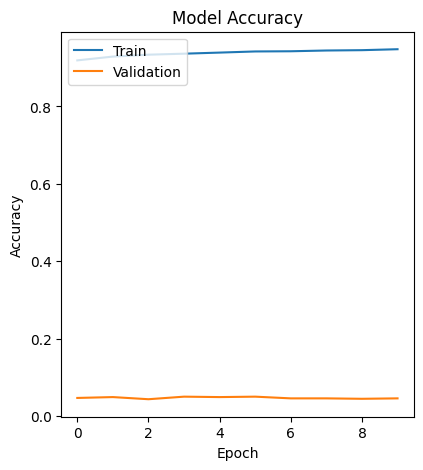

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Plotting training & validation loss values

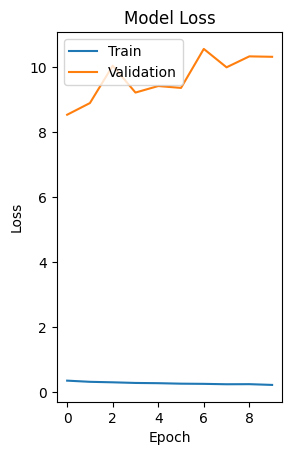

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Saved Models/twiLoc_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
